In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
#!pip install scikeras
#!pip install tensorflow==2.17.1

In [3]:
'''!pip install keras==2.17.0
!pip install numpy==1.24.3
!pip install opencv-python==4.10.0.84
!pip install matplotlib==3.9.4
!pip install imutils==0.5.3'''

'!pip install keras==2.17.0\n!pip install numpy==1.24.3\n!pip install opencv-python==4.10.0.84\n!pip install matplotlib==3.9.4\n!pip install imutils==0.5.3'

In [4]:
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [5]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

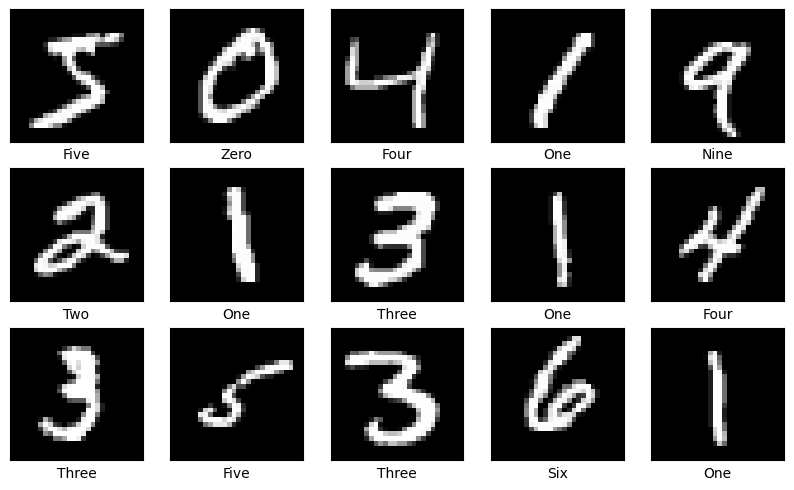

In [7]:
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='grey')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [8]:
X_train_digit.shape

(60000, 28, 28)

In [9]:
X_test_digit.shape

(10000, 28, 28)

In [10]:
y_train_digit.shape

(60000,)

In [11]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [12]:
X_train_digit.shape

(60000, 784)

In [13]:
y_test_digit.shape

(10000,)

In [14]:
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [16]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

C:\Users\anora\Documents\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
history=model.fit(X_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6890 - loss: 3.8186 - val_accuracy: 0.8802 - val_loss: 0.3855
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9055 - loss: 0.2676 - val_accuracy: 0.9119 - val_loss: 0.2674
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9235 - loss: 0.1633 - val_accuracy: 0.9264 - val_loss: 0.1938
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9279 - loss: 0.1305 - val_accuracy: 0.9090 - val_loss: 0.1722
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9289 - loss: 0.1131 - val_accuracy: 0.9167 - val_loss: 0.1593
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9260 - loss: 0.0877 - val_accuracy: 0.9127 - val_loss: 0.1410
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9207 - loss: 0.0820 - val_accuracy: 0.9168 - val_loss: 0.1406
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9239 - loss: 0.0727 - val_accuracy: 0

In [29]:
'''
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])
'''

"\nmodel=keras.Sequential([\n    layers.Dense(256,activation='relu',input_shape=(784,)),\n    layers.Dropout(0.3),\n    layers.BatchNormalization(),\n    layers.Dense(64,activation='relu'),\n    layers.Dropout(0.3),\n    layers.BatchNormalization(),\n    layers.Dropout(0.3),\n    layers.BatchNormalization(),\n    layers.Dense(64,activation='relu'),\n    layers.Dropout(0.3),\n    layers.BatchNormalization(),\n    layers.Dense(10,activation='sigmoid'),\n])\n"

In [30]:
y_predict=model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
y_predict[0]

array([0.07894029, 0.348055  , 0.5765233 , 0.9062835 , 0.05264735,
       0.15043868, 0.00848407, 0.9999863 , 0.10474399, 0.94082534],
      dtype=float32)

In [33]:
y_predicts=np.argmax(y_predict,axis=1)

In [34]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [36]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

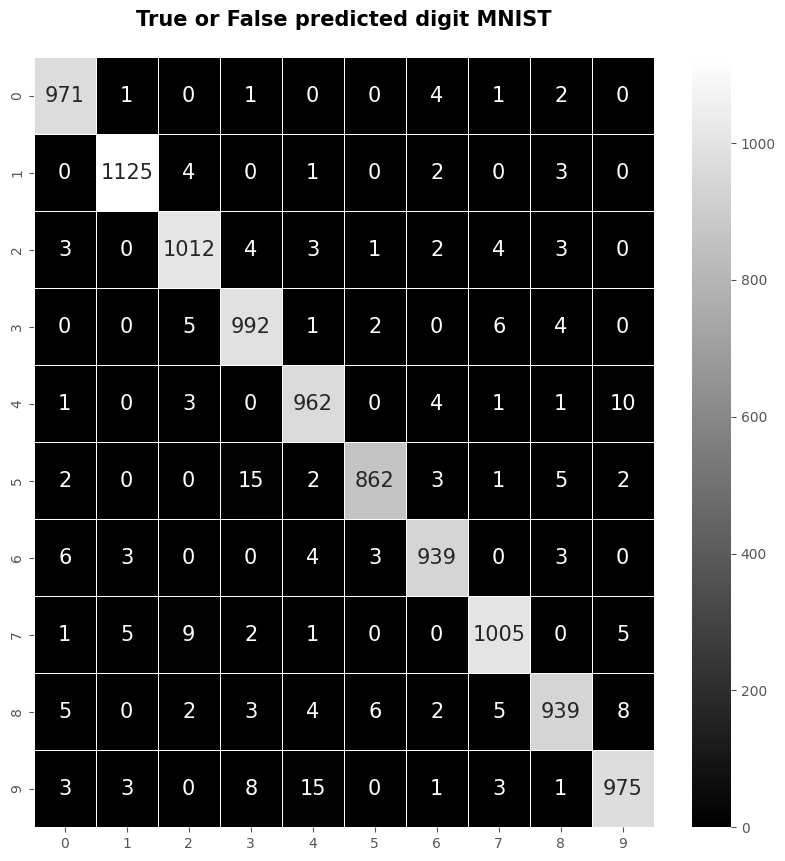

In [40]:
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



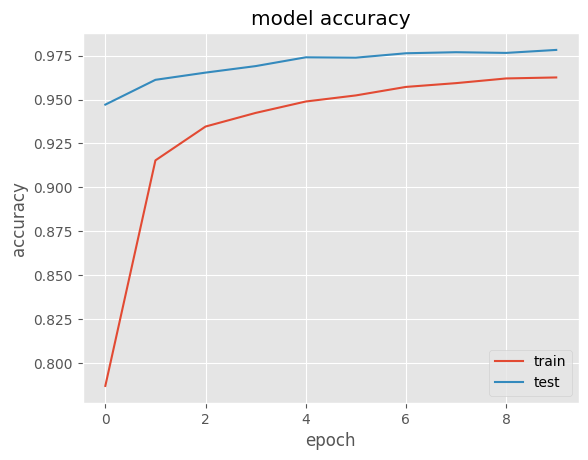

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

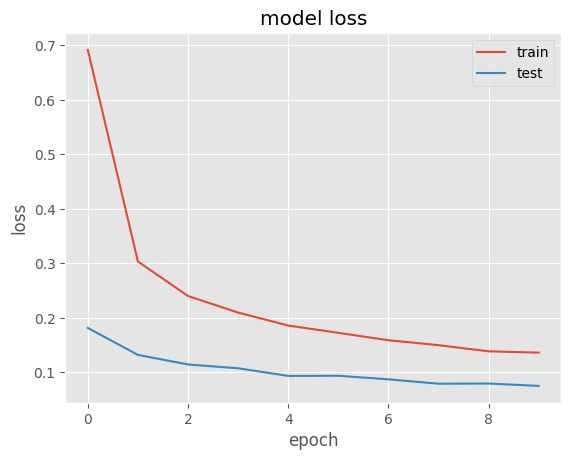

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [49]:
y_predict_single=model.predict(X_test_digit[2].reshape(1,-1))
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


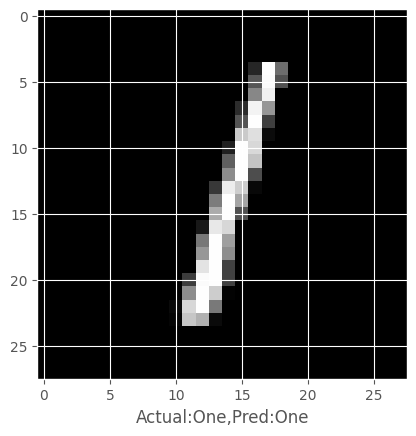

In [50]:
# Names of numbers in the dataset in order
col_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Visualizing the digits
# plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])], col_names[y_predicts_single[0]]))
plt.show()
